In [6]:
%autoreload 2

In [7]:
from rdkit import Chem

In [8]:
mol = Chem.MolFromPDBFile("9BW_lig.pdb")

In [9]:
atom = mol.GetAtomWithIdx(0)
atom.GetPDBResidueInfo().GetName()

' C1 '

In [19]:

from fksfold.mol_utils import *

import sys
df, ligand_res_names, output_pdb = biopandas_extract_ligand_and_write_to_pdb("./center_10_macro_2.cif")
ref_smiles = {
    "G74": "CN1C=C(C=N1)C1=CN=C(N)C2=C1SC=C2C1=CC2=C(C=C1)N(CC2)C(=O)CC1=CC=CC=C1",
    "9BW": "C[C@H](NC(=O)[C@@H]1C[C@@H](O)CN1C(=O)[C@@H](N)C(C)(C)C)C1=CC=C(C=C1)C1=C(C)N=CS1"
}
small_mols = [get_ligand_mol_from_pdb(pdb, ref_smiles[ligand_name]) for ligand_name, pdb in zip(ligand_res_names, output_pdb)]
smiles = "c1(c2c3c(sc2)c(cnc3N)C2=CNN(C2)CC(=O)NCCc2ccc(cc2)OCC(=O)N[C@H](C(=O)N2C[C@H](O)C[C@H]2C(=O)N[C@H](c2ccc(cc2)c2scnc2C)C)C(C)(C)C)ccc2c(c1)CCN2C(=O)Cc1ccccc1"
large_mol = Chem.MolFromSmiles(smiles)
large_mol = assign_chai_lab_atom_names_to_mol(large_mol)
large_mol_atom_name_mapping = get_rdkit_index_to_atom_name_map_smiles(large_mol)
match_result = match_ligands_atom_to_large_mol_atom(small_mols, large_mol)
for ligand_name, ligand_mol, match_result in zip(ligand_res_names, small_mols, match_result):
    # get atom name mapping from ligand_mol to large_mol
    ligand_atom_name_mapping = get_rdkit_index_to_atom_name_map_pdb(ligand_mol)
    for ligand_atom_idx, large_mol_atom_idx in match_result:
        ligand_atom_name = ligand_atom_name_mapping[ligand_atom_idx]
        large_mol_atom_name = large_mol_atom_name_mapping[large_mol_atom_idx]
        print(f"{ligand_name} {ligand_atom_name} {large_mol_atom_name}")

/home/psi-cmd/projects/chai-lab/FKSFold-self/fksfold/mol_utils.py:112: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ligand_atoms.loc[:, "atom_number"] = range(1, len(ligand_atoms) + 1)
/home/psi-cmd/projects/chai-lab/FKSFold-self/fksfold/mol_utils.py:112: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ligand_atoms.loc[:, "atom_number"] = range(1, len(ligand_atoms) + 1)
[12:53:51] WARNING: More than one matching pattern found - picking one

[12:53:51] WARNING: More than one matching pattern found - picking o

G74 C3 C2
G74 C1 C1
G74 C4 C47
G74 C17 C48
G74 C2 C49
G74 C5 C50
G74 C6 C51
G74 C18 C52
G74 C19 C53
G74 N5 N10
G74 C20 C54
G74 O1 O7
G74 C21 C55
G74 C22 C56
G74 C23 C57
G74 C25 C58
G74 C27 C59
G74 C26 C60
G74 C24 C61
G74 C7 C3
G74 C8 C4
G74 S1 S1
G74 C9 C5
G74 C12 C6
G74 C11 C7
G74 N1 N1
G74 C10 C8
G74 N2 N2
G74 C13 C9
G74 C15 C11
G74 N4 N4
G74 N3 N3
G74 C14 C10
G74 C16 C12
9BW C7 C34
9BW C5 C33
9BW C11 C32
9BW C6 C37
9BW C8 C36
9BW C15 C35
9BW C16 C38
9BW S1 S2
9BW C9 C39
9BW N2 N9
9BW C14 C40
9BW C1 C41
9BW C21 C31
9BW N3 N8
9BW C12 C30
9BW O1 O6
9BW C23 C29
9BW C13 C28
9BW C19 C27
9BW C20 C26
9BW N1 N7
9BW C10 C25
9BW O2 O4
9BW C17 C24
9BW N4 N6
9BW C18 C43
9BW C4 C44
9BW C3 C45
9BW C2 C46
9BW O3 O5
9BW C22 C42


In [20]:
for atom in large_mol.GetAtoms():
    atom.SetProp("atomLabel", large_mol_atom_name_mapping[atom.GetIdx()])


In [21]:
for ligand_mol in small_mols:
    for atom in ligand_mol.GetAtoms():
        ligand_atom_name_mapping = get_rdkit_index_to_atom_name_map_pdb(ligand_mol)
        atom.SetProp("atomLabel", ligand_atom_name_mapping[atom.GetIdx()])
        

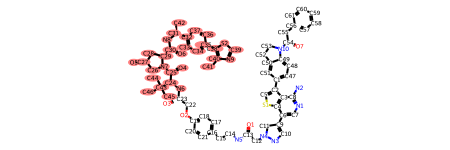

In [22]:
large_mol

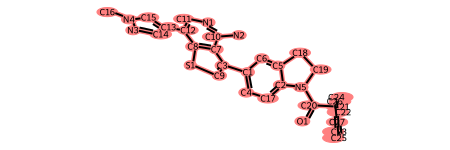

In [25]:
small_mols[0]

In [12]:
from rdkit import Chem
from rdkit.Chem import rdForceFieldHelpers

# add force field
small_mols[0] = Chem.AddHs(small_mols[0])
Chem.SanitizeMol(small_mols[0])
small_mols[0] = rdForceFieldHelpers.MMFFOptimizeMolecule(small_mols[0])

small_mols

[20:54:13] 

****
Invariant Violation
bad direction in linearSearch
Violation occurred on line 224 in file /project/build/temp.linux-x86_64-cpython-310/rdkit/Code/Numerics/Optimizer/BFGSOpt.h
Failed Expression: status >= 0
----------
Stacktrace:
----------
****



RuntimeError: Invariant Violation
	bad direction in linearSearch
	Violation occurred on line 224 in file Code/Numerics/Optimizer/BFGSOpt.h
	Failed Expression: status >= 0
	RDKIT: 2024.09.6
	BOOST: 1_85


In [ ]:
atom_names_from_smiles("c1ccc(c(c1)/C=C/[C@H]2CN(C(=O)[C@@H]3CCC[C@H]2N3S(=O)(=O)c4cc(cc(c4)Cl)Cl)Cc5ccccn5)Cl")

['C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'C6',
 'C7',
 'C8',
 'C9',
 'C10',
 'N1',
 'C11',
 'O1',
 'C12',
 'C13',
 'C14',
 'C15',
 'C16',
 'N2',
 'S1',
 'O2',
 'O3',
 'C17',
 'C18',
 'C19',
 'C20',
 'C21',
 'C22',
 'CL1',
 'CL2',
 'C23',
 'C24',
 'C25',
 'C26',
 'C27',
 'C28',
 'N3',
 'CL3']

In [ ]:
atom_names_from_smiles("c1ccc(c(c1)/C=C/[C@H]2CN(C(=O)[C@@H]3CCC[C@H]2N3S(=O)(=O)c4cc(cc(c4)Cl)Cl)Cc5ccccn5)Cl")

['C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'C6',
 'C7',
 'C8',
 'C9',
 'C10',
 'N1',
 'C11',
 'O1',
 'C12',
 'C13',
 'C14',
 'C15',
 'C16',
 'N2',
 'S1',
 'O2',
 'O3',
 'C17',
 'C18',
 'C19',
 'C20',
 'C21',
 'C22',
 'CL1',
 'CL2',
 'C23',
 'C24',
 'C25',
 'C26',
 'C27',
 'C28',
 'N3',
 'CL3']

In [10]:
"""Utility to reproduce Chai-Lab ligand atom naming from SMILES.

给定一个 SMILES 字符串，返回与 `RefConformerGenerator.generate` 完全一致的
atom name 列表（如 C1、C2、N1 等）。

Usage (CLI):
    python -m chai_lab.utils.smiles_atom_namer "Cc1ccccc1"
"""

from __future__ import annotations

from collections import defaultdict
from typing import List
import sys

from rdkit import Chem


def atom_names_from_smiles(smiles: str) -> List[str]:
    """Return atom names following the Chai-Lab convention.

    The algorithm matches `RefConformerGenerator.generate`:
      1. Parse SMILES with RDKit to obtain canonical heavy-atom order.
      2. Add explicit hydrogens (these do **not** affect heavy-atom indices).
      3. Assign names element+counter (C1, C2, …) in current atom order.
      4. Remove hydrogens; the remaining heavy atoms retain the names.
    """

    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        raise ValueError(f"Invalid SMILES: {smiles}")

    # Step 2: add/remove hydrogens to mirror original pipeline
    mol = Chem.AddHs(mol)

    element_counter: dict[str, int] = defaultdict(int)
    for atom in mol.GetAtoms():
        elem = atom.GetSymbol()
        element_counter[elem] += 1
        # Upper-case names to match upstream code
        atom.SetProp("name", f"{elem.upper()}{element_counter[elem]}")

    # Remove hydrogens – heavy atoms keep their properties and order
    mol = Chem.RemoveHs(mol)

    return [atom.GetProp("name") for atom in mol.GetAtoms()]

In [12]:
atom_names_from_smiles("c1ccc(c(c1)/C=C/[C@H]2CN(C(=O)[C@@H]3CCC[C@H]2N3S(=O)(=O)c4cc(cc(c4)Cl)Cl)Cc5ccccn5)Cl")

['C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'C6',
 'C7',
 'C8',
 'C9',
 'C10',
 'N1',
 'C11',
 'O1',
 'C12',
 'C13',
 'C14',
 'C15',
 'C16',
 'N2',
 'S1',
 'O2',
 'O3',
 'C17',
 'C18',
 'C19',
 'C20',
 'C21',
 'C22',
 'CL1',
 'CL2',
 'C23',
 'C24',
 'C25',
 'C26',
 'C27',
 'C28',
 'N3',
 'CL3']

In [1]:
from biopandas.mmcif import PandasMmcif

cif = PandasMmcif().read_mmcif("9nfr_clean.cif")
coords = cif.df["ATOM"][["Cartn_x", "Cartn_y", "Cartn_z"]].to_numpy()



In [2]:
from fksfold.utils import ProteinDFUtils
import numpy as np
from scipy.spatial.transform import Rotation as R


/home/psi-cmd/.local/lib/python3.10/site-packages/Bio/pairwise2.py:278: BiopythonDeprecationWarning: Bio.pairwise2 has been deprecated, and we intend to remove it in a future release of Biopython. As an alternative, please consider using Bio.Align.PairwiseAligner as a replacement, and contact the Biopython developers if you still need the Bio.pairwise2 module.
  warnings.warn(


In [4]:
rot = R.random().as_matrix()
coords_rot = coords @ rot.T

square_error, grad = ProteinDFUtils._kabsch_square_error_and_derivative(coords_rot, coords)
print("Square error:", square_error)
print("Grad shape:", grad.shape)


Square error: 1.880225322027303e-23
Grad shape: (3300, 3)


In [11]:
# random mat like coords, verify grad is correct
rand_mat = np.random.rand(coords.shape[0], coords.shape[1])
square_error = 1e10
counter = 0
while square_error > 1:
    square_error, grad = ProteinDFUtils._kabsch_square_error_and_derivative(rand_mat, coords)
    print(f"square_error: {square_error}")
    print(f"grad norm: {np.linalg.norm(grad)}")
    rand_mat -= grad * 1e-2
    counter += 1

print(f"Steps: {counter}")

square_error: 1952666.580869006
grad norm: 2794.7569345966435
square_error: 1875340.9842665915
grad norm: 2738.8617959047083
square_error: 1801077.4812896366
grad norm: 2684.0845599866157
square_error: 1729754.8130305666
grad norm: 2630.4028687868836
square_error: 1661256.5224345552
grad norm: 2577.794811411145
square_error: 1595470.7641461494
grad norm: 2526.2389151829248
square_error: 1532290.12188596
grad norm: 2475.7141368792645
square_error: 1471611.433059276
grad norm: 2426.1998541416788
square_error: 1413335.6203101294
grad norm: 2377.675857058846
square_error: 1357367.5297458463
grad norm: 2330.122339917667
square_error: 1303615.7755679106
grad norm: 2283.519893119314
square_error: 1251992.590855423
grad norm: 2237.8494952569295
square_error: 1202413.6842575478
grad norm: 2193.0925053517894
square_error: 1154798.1023609494
grad norm: 2149.230655244755
square_error: 1109068.0975074552
grad norm: 2106.2460421398596
square_error: 1065149.0008461613
grad norm: 2064.1211212970625
sq